# Assignment 1 

 ### **Due November 15th** 

For this assignment, you will be creating a visualization that will enhance the data summaries displayed on the Leanpath platform. Leanpath currently displays four primary graphs under the Food Waste Dashboard: Top Wasted Foods, Top Loss Reasons, Waste by Day of Week, and Waste Trend. While these provide general insights that can be helpful for dining hall managers, we can further inspect this data for our personal use. 

Be creative and impactful when developing your graphs. For example, I built off the Cafe 3's Waste by Week bar graph by taking the average waste per day across the month of October and adding the division of food categories per day. This data can be applied to better mitigation of food waste reduction efforts as we can advise dining hall managers to reduce the number of a certain food group served on a certain week day if the trend is consistent over time. 

If you are stuck on where to start, some areas to analyze include: meal periods ([refer to Berkeley Dining operational hours](https://dining.berkeley.edu/locations/hours-of-operation/week-of-november-3/)), changes in waste for certain food groups over time, or expand the code I created for another dining common. 
    
If you need additional support, please email Natalie at nataliesnchz@berkeley.edu 

### Leanpath Login Information 
[Leanpath Website](https://online.leanpath.com/ccm/food-waste-dashboard/overview)

Username: scasey92@berkeley.edu

Password: Wtfairbears5445!

![Leanpath Dashboard](/Images/Leanpath_Snippet.png)

## Question 1 
**In 2-4 sentences, pleasae describe what you are choosing to focus on and the significance of these results to food waste reduction.**


For my assignment, I am focusing on waste consistency over time across all locations in the past 30 days. Analyzing waste consistency over time allows the dining staff to identify persistent patterns in food waste, such as particular days or meal periods with higher waste levels. This insight incentivizes adjustments, such as reducing portions for consistently overproduced items. It also supports proactive planning, helping staff anticipate and mitigate waste spikes before they occur, thereby improving resource efficiency and sustainability outcomes.

## Import Packages 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import Data 
If you choose to focus on data from last month in Cafe 3, the data is already loaded under the data folder titled 'Waste_Data_C3'. This data is very comprehensive - be sure to click on the csv file on the left plane to view the different columns available. 

In [4]:
## All Locations Waste Date
wastedata = pd.read_csv("Data/Waste-Data.csv")
wastedata.head()

## If you want to work with a different data set, refer to Natalie's recording for a visual demonstration of uploading data. 
## The general steps are: download the data (xls file) > open Excel and save the file as a csv file > drag the data to the leftplane 


,Date,Time,Site,Location,Client Location ID,Device,Country,Region,Segment,Cost,...,Food Item Category,Loss Reason,Source,Disposition,Container,Stage of Processing,Operator,Event Order No.,Edited,Unnamed: 26
0,11/11/2024,21:29:17,University of California - Berkeley,Cafe 3,NaN,Cafe 3 - LC0456,US,NORAM,College/University,18.67,...,Mixed Foods,Overproduction,Center Plate,Donation,Donation Pan,Pre-Consumer,FSW,NaN,0,NaN
1,11/11/2024,21:25:48,University of California - Berkeley,Cafe 3,NaN,Cafe 3 - LC0456,US,NORAM,College/University,22.21,...,Meat-Protein,Overproduction,Center Plate,Donation,Shotgun Pan (4-inch) Metal,Pre-Consumer,FSW,NaN,0,NaN
2,11/11/2024,21:24:10,University of California - Berkeley,Cafe 3,NaN,Cafe 3 - LC0456,US,NORAM,College/University,22.51,...,Meat-Protein,Presented - Not Sold,Bear Fit,Donation,Half Sheet,Pre-Consumer,Student,NaN,0,NaN
3,11/11/2024,21:22:58,University of California - Berkeley,Cafe 3,NaN,Cafe 3 - LC0456,US,NORAM,College/University,5.98,...,Starch,Presented - Not Sold,Bear Fit,Donation,Half Sheet,Pre-Consumer,Student,NaN,0,NaN
4,11/11/2024,21:21:51,University of California - Berkeley,Cafe 3,NaN,Cafe 3 - LC0456,US,NORAM,College/University,8.18,...,Fruit-Vegetable,Overproduction,Center Plate,Compost,Full Hotel Pan (2.5-inch) Metal,Pre-Consumer,Austin daCook,NaN,0,NaN


## Coding Space 
Below is where you will primarily be working for this assignment. The first code chunk is my data set you all can refer to if needed, and the second code chunk is where you will be inputting your data. 

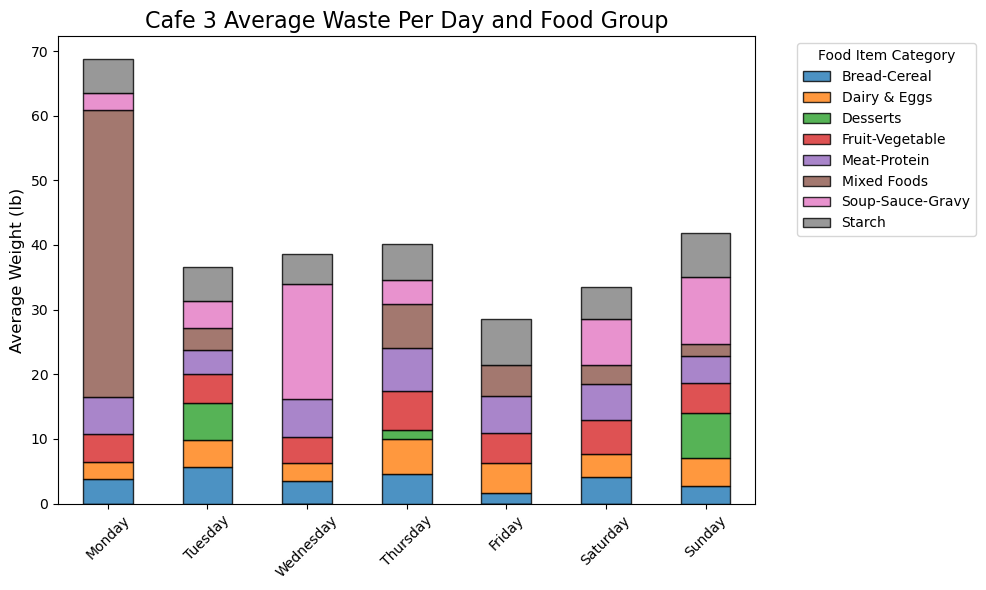

In [ ]:
## NATALIE'S CODE 

## Touching up Data [Dates]
cafe3['Date'] = pd.to_datetime(cafe3['Date'], errors='coerce') # Dates are in the correct format for the code to read 
cafe3['Day_of_Week'] = cafe3['Date'].dt.day_name()

weekly_average = (
    cafe3.groupby(['Day_of_Week', 'Food Item Category'])['Weight']
    .mean()
    .unstack(fill_value=0)
)

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_average = weekly_average.reindex(day_order)

## Stacked Bar Chart 
weekly_average.plot(kind='bar', stacked=True, figsize=(10, 6), alpha=0.8, edgecolor='black')

plt.title('Cafe 3 Average Waste Per Day and Food Group', fontsize=16)
plt.xlabel('')
plt.ylabel('Average Weight (lb)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Food Item Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

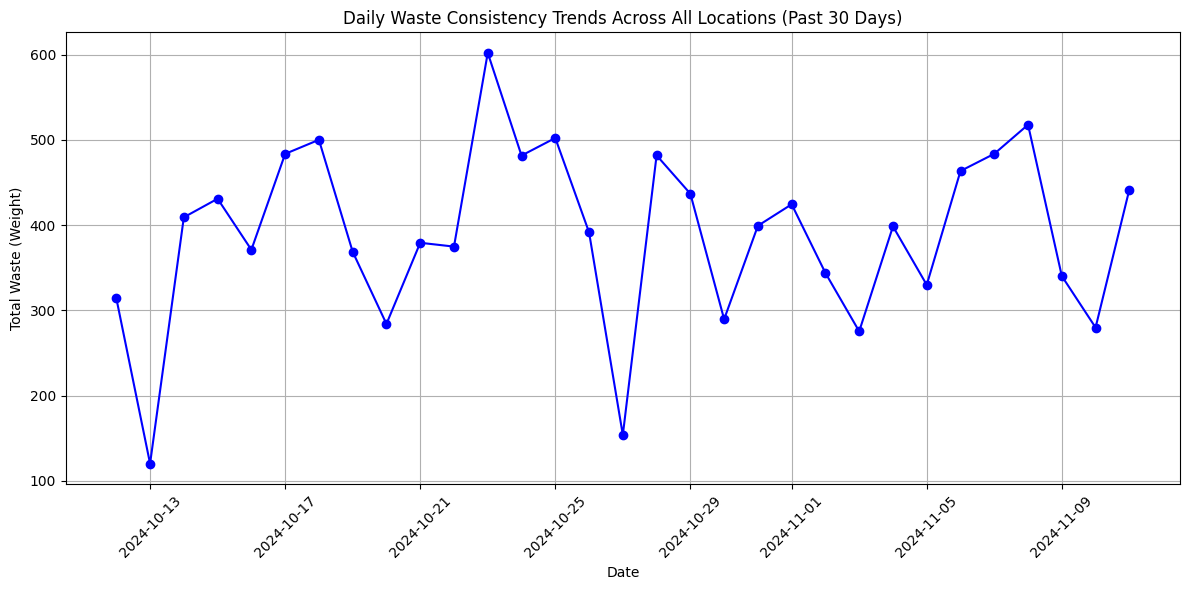

In [7]:
## ANNIE's CODE 

import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

# Convert 'Date' column to datetime format
wastedata['Date'] = pd.to_datetime(wastedata['Date'], errors='coerce')

# Filter data for the past 30 days
end_date = wastedata['Date'].max()
start_date = end_date - timedelta(days=30)
recent_waste_data = wastedata[(wastedata['Date'] >= start_date) & (wastedata['Date'] <= end_date)]

# Aggregate daily waste totals across all locations
daily_waste = recent_waste_data.groupby('Date')['Weight'].sum().reset_index()

# Plotting the daily waste trend for the past 30 days
plt.figure(figsize=(12, 6))
plt.plot(daily_waste['Date'], daily_waste['Weight'], marker='o', color='b', linestyle='-')
plt.title('Daily Waste Consistency Trends Across All Locations (Past 30 Days)')
plt.xlabel('Date')
plt.ylabel('Total Waste (Weight)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Question 2
**What did your results find? How can this be useful for future food recovery efforts? (2-5 sentences)**

The results reveal fluctuations in daily waste levels across dining locations over the past 30 days, with certain days showing higher waste volumes. For example, the peak in the past month was during the Week of 10/21. I could theorize that this could be due to the peak of midterm season. Identifying these peaks and patterns helps dining staff anticipate times of increased waste, such as specific weekdays or periods, and adjust food preparation accordingly.

## Output 
After you complete your code and have a generated graph/visual representation, be sure to export the codespace as a pdf. A visual demonstration is provided in the video sent by Natalie, but here are the general steps: click the elipses in the tabs bar > export > pdf. It will take a second for the pdf to generate, but it will appear in the left plane and you can download the pdf to your computer from there. 

After the pdf is downloaded, please email Natalie. 